In [1]:
import os
import re
import pendulum as pendulum
from pymongo import MongoClient
import numpy as np
import pandas as pd
import time
from datetime import datetime,timedelta, timezone
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

pd.set_option('mode.chained_assignment',  None)

In [2]:
folder_path = '../raw_data/df_notecreate'
file_list = sorted([file for file in os.listdir(folder_path) if file.endswith('.csv')])

retention_data = []
next_users = set()

for file in file_list:
    df = pd.read_csv(os.path.join(folder_path, file))
    # 현재 달의 방문한 userId 집합
    current_users = set(df['userId'])
    # 이번 달에도 방문한 userId 중 다음 달에도 방문한 userId
    retained_users = len(current_users.intersection(next_users))
    # 현재 달의 잔존율 계산
    retention_rate = round((retained_users / len(next_users)) * 100, 1)  if len(next_users) > 0 else 0

    year_month = re.search(r'df_notecreate_(\d{4}_\d{2})\.csv', file).group(1)
    retention_data.append([year_month, retained_users, retention_rate])
    # 다음 달의 유저를 현재 달의 유저로 설정
    next_users = current_users

retention_bynotecreate = pd.DataFrame(retention_data, columns=['month', 'retained_users', 'retention_rate'])

/tmp/ipykernel_130966/1743641542.py:8: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(folder_path, file))


In [3]:
retention_bynotecreate

,month,retained_users,retention_rate
0,2022_03,0,0.0
1,2022_04,78855,62.2
2,2022_05,130469,47.9
3,2022_06,129675,48.1
4,2022_07,103685,39.5
5,2022_08,99749,46.3
6,2022_09,109607,48.8
7,2022_10,156088,53.0
8,2022_11,165889,53.1
9,2022_12,155231,52.5


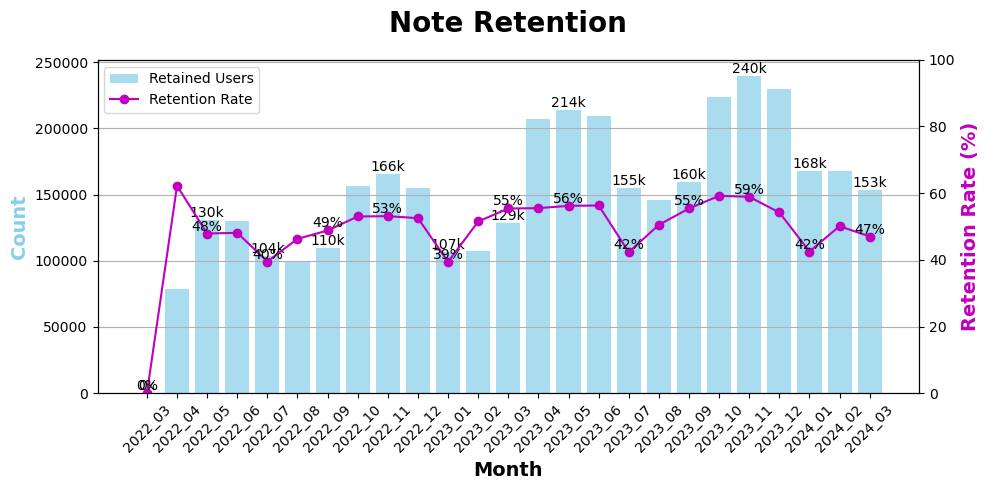

In [7]:
x_values = retention_bynotecreate['month']
retained_users = retention_bynotecreate['retained_users']
retention_rate = retention_bynotecreate['retention_rate']

fig, ax1 = plt.subplots(figsize=(10, 5))

# 막대 그래프 그리기 (retained_users)
ax1.bar(x_values, retained_users, color='skyblue', alpha=0.7, label='Retained Users')
ax1.set_ylabel('Count', color='skyblue', fontsize=14, fontweight='bold')

# 선 그래프 그리기 (retention_rate)
ax2 = ax1.twinx()
ax2.plot(x_values, retention_rate, color='m', marker='o', label='Retention Rate')
ax2.set_ylabel('Retention Rate (%)', color='m', fontsize=14, fontweight='bold')
ax2.set_ylim(0, 100)

plt.title('Note Retention', fontsize=20, fontweight='bold', pad=20)
ax1.set_xlabel('Month', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

ax1.tick_params(axis='x', rotation=45)

# 그리드 표시
ax1.grid(axis='y')

highlight_months = {'2023-10', '2023-11', '2023-12'}

for i, (users, rate) in enumerate(zip(retained_users, retention_rate)):
    month = x_values[i]  # 해당 인덱스의 월을 가져옴
    if month in highlight_months:
        ax1.text(month, users, f'{users/1000:.0f}k', ha='center', va='bottom', fontsize=10, color='red')
        ax2.text(month, rate, f'{rate:.0f}%', ha='center', va='bottom', fontsize=10, color='red')
    else:
        if i % 2 == 0:
            ax1.text(x_values[i], users, f'{users/1000:.0f}k', ha='center', va='bottom', fontsize=10, color='black')
            ax2.text(x_values[i], rate, f'{rate:.0f}%', ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()
